In [2]:
import cv2
import numpy as np
import os
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def plot_images(img1,img2,title1="",title2=""):
    fig=plt.figure(figsize=[15,15])
    ax1=fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[],yticks=[],title=title1)
    
    ax2=fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[],yticks=[],title=title2)
    

In [263]:
path = "./images/car5.jpg"

In [264]:
image = cv2.imread(path)

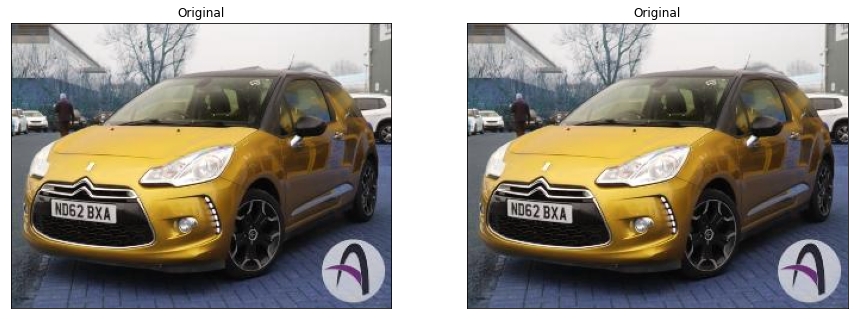

In [265]:
plot_images(image,image,title1="Original",title2="Original")

In [266]:
gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

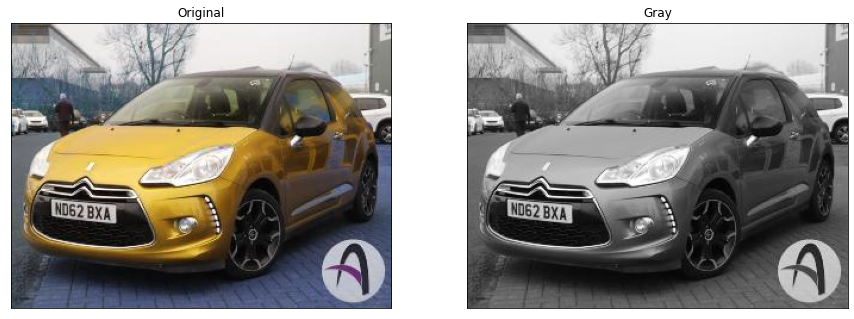

In [267]:
plot_images(image,gray,title1="Original",title2="Gray")

In [268]:
blur= cv2.bilateralFilter(gray, 11, 90,90)

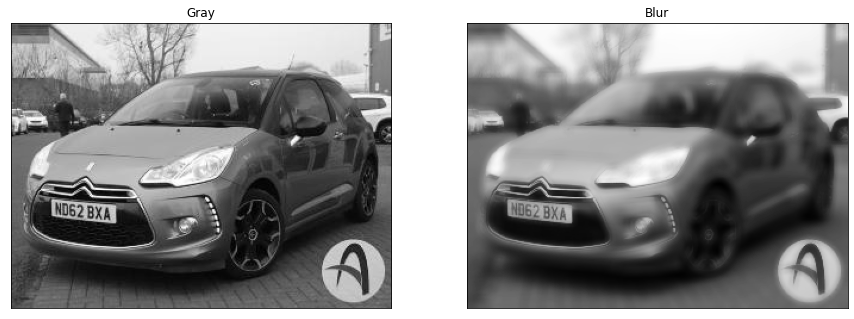

In [269]:
plot_images(gray,blur,title1="Gray",title2="Blur")

In [270]:
edges=cv2.Canny(blur,30,200)

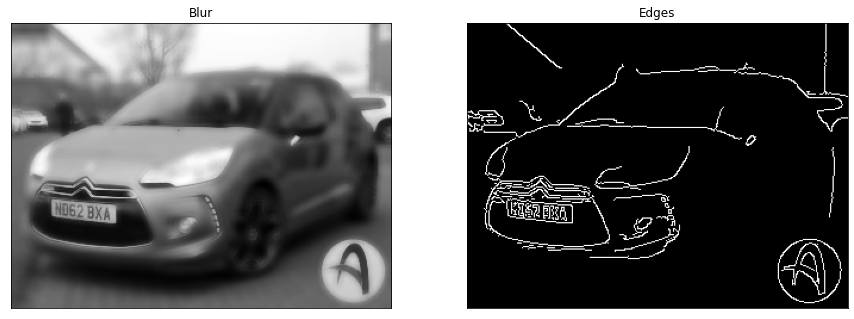

In [271]:
plot_images(blur,edges,title1="Blur",title2="Edges")

In [272]:
cnts, new=cv2.findContours(edges.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [273]:
image_copy=image.copy()

In [274]:
_=cv2.drawContours(image_copy,cnts,-1,(255,0,255),2)

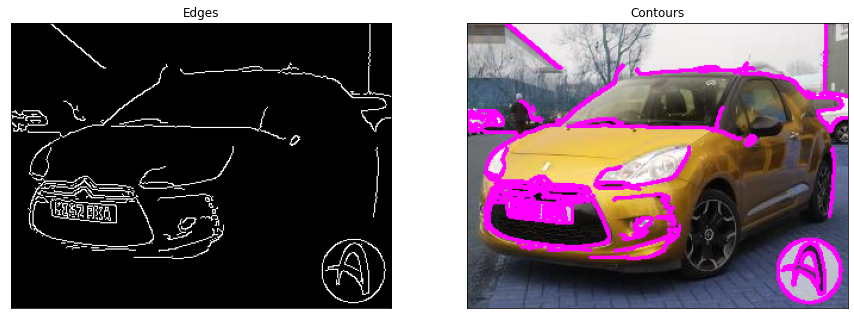

In [275]:
plot_images(edges,image_copy,title1="Edges",title2="Contours")

In [276]:
print(len(cnts))

71


In [277]:
cnts=sorted(cnts,key=cv2.contourArea,reverse=True)[:10]

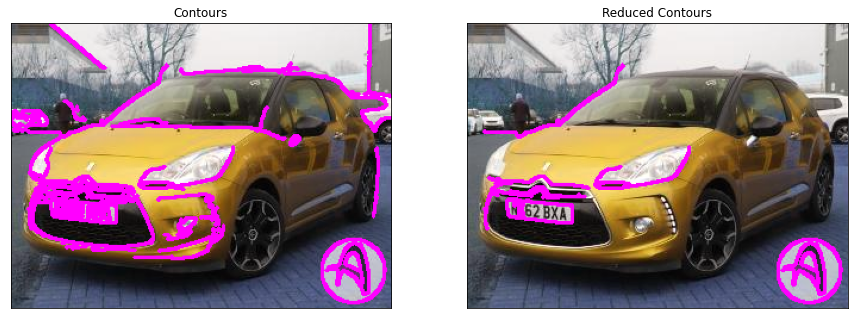

In [278]:
image_reduced_cnts=image.copy()
_=cv2.drawContours(image_reduced_cnts,cnts,-1,(255,0,255),2)
plot_images(image_copy,image_reduced_cnts,title1="Contours",title2="Reduced Contours")

In [279]:
print(len(cnts))

10


In [280]:
plate = None
for c in cnts:
    perimeter=cv2.arcLength(c,True)
    edges_count=cv2.approxPolyDP(c,0.02 * perimeter, True)
    if len(edges_count)==4:
        x,y,w,h=cv2.boundingRect(c)
        plate=image[y:y+h,x:x+w]
        break

cv2.imwrite("plate.png",plate)

True

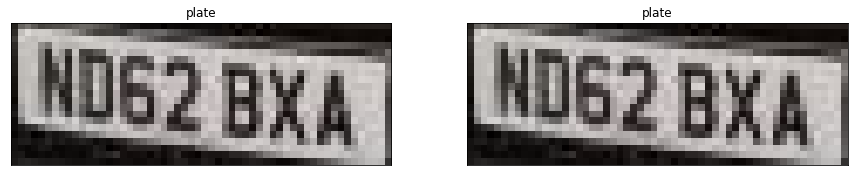

In [281]:
 plot_images(plate,plate,title1="plate",title2="plate")

In [284]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(plate, lang='eng')
print(text)


NDE? BXA |

